In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import json
import seaborn as sns
import sys
# Needed for Python to find the util modules
sys.path.insert(0, "src")
sys.path.insert(0, "..")
import util.m06_model_plotting as plot_util
import util.m00_general_util as util

In [4]:
print(os.getcwd())
#os.chdir("..\..")

C:\Users\sebne\OneDrive\Documents\FHWN_Tulln\DataAnalysis\repo


In [5]:
my_files = ["temp/CNN_jsons/plotting/model_output_cnn_2layer1.json",
            "temp/CNN_jsons/plotting/model_output_cnn_2layer2.json",
            "temp/CNN_jsons/plotting/model_output_cnn_2layer3.json"
         ]
util.merge_json_files(my_files, output_file="cnn_2_layer.json")

my_files = ["temp/CNN_jsons/plotting/model_output_cnn_1layer1.json",
            "temp/CNN_jsons/plotting/model_output_cnn_1layer2.json",
            "temp/CNN_jsons/plotting/model_output_cnn_1layer3.json"
         ]
util.merge_json_files(my_files, output_file="cnn_1_layer.json")

my_files = ["temp/CNN_jsons/plotting/model_output_cnn_3layer1.json",
            "temp/CNN_jsons/plotting/model_output_cnn_3layer2.json",
            "temp/CNN_jsons/plotting/model_output_cnn_3layer3.json"
         ]
util.merge_json_files(my_files, output_file="cnn_3_layer.json")

In [26]:
def plot_weight_decay(score_type, path) :
    files = {
        "cnn_1_layer.json": "1 Layer",
        "cnn_2_layer.json": "2 Layers",
        "cnn_3_layer.json": "3 Layers"
    }
    
    plt.figure(figsize=(8, 5))
    
    # Iterate over the files
    for filename, label in files.items():
        with open(f"{path}/{filename}", "r") as file:
            data = json.load(file)
            
        filtered_data = [entry for entry in data if entry["model"] == "CNN" and entry["baseline_corr"] == "detrendsnv"]
        regularizers = []
        test_r2_scores = []
    
        for entry in filtered_data:
            regularizer = entry['best_params']['model__model_kwargs']['regularizer']
            r2_score = entry[score_type]
            regularizers.append(regularizer)
            test_r2_scores.append(r2_score)
    
        # Sort values for plotting
        sorted_indices = sorted(range(len(regularizers)), key=lambda i: regularizers[i])
        regularizers = [regularizers[i] for i in sorted_indices]
        test_r2_scores = [test_r2_scores[i] for i in sorted_indices]
    
        # Plot
        plt.plot(regularizers, test_r2_scores, marker='o', linestyle='-', label=label)
    
    plt.xscale('log')
    plt.xlabel("L2 Regularizer")
    plt.ylabel("Train R²")
    #plt.title("CNN Test R² vs Regularizer Across Layer Configurations")
    plt.grid(True, which='both',linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.box(False)
    plt.show()
    #plt.savefig("temp/CNN_jsons/plotting/consolidated/cnn_layers_train.png")


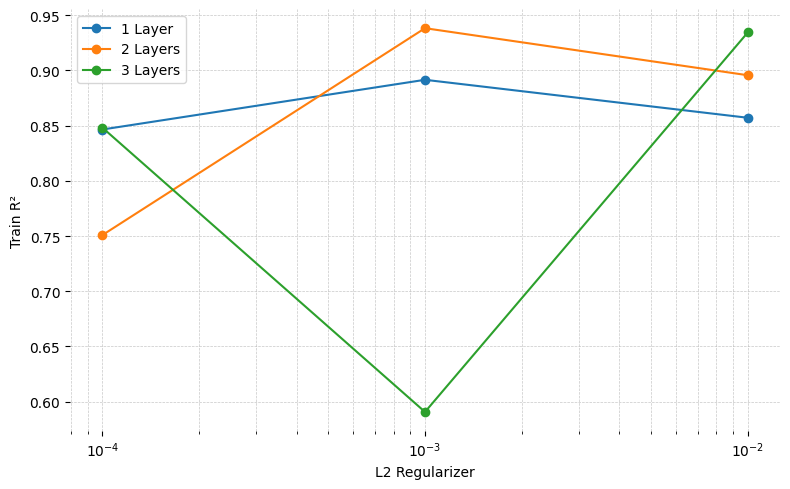

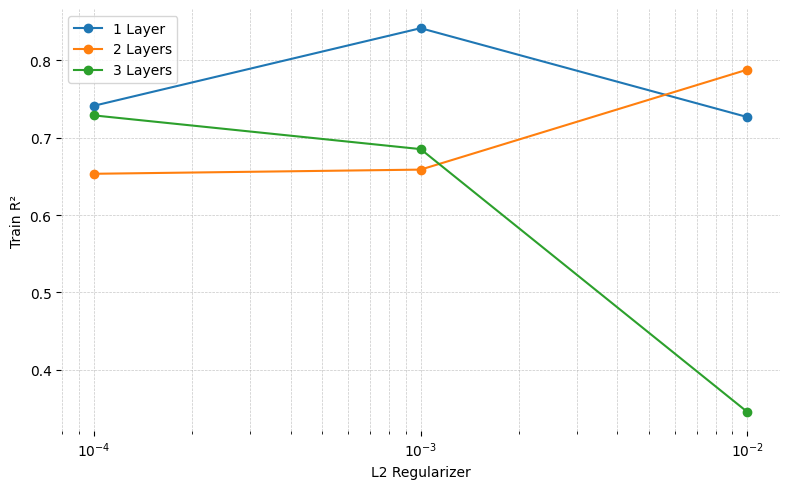

In [27]:
dir_cnn = "temp/CNN_jsons/plotting/consolidated"
plot_weight_decay(score_type='Train_R2', path=dir_cnn)
plot_weight_decay(score_type='CV_R2', path=dir_cnn)
#plot_weight_decay(score_type='Test_R2', path=dir_cnn)